In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc 
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" #폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)

In [4]:
# 데이터 불러오기
# 201903-202003 데이터
data = pd.read_csv("./jeju_data_201901-202003/201901-202003.csv")
result = pd.read_csv("./jeju_data_201901-202003/submission.csv")

## meta data
### Features
- REG_YYMM : 년월
- CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
- CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
- STD_CLSS_NM : 업종명
- HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
- HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
- AGE : 연령대
- SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
- FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT : 이용고객수 (명)
- AMT : 이용금액 (원)
- CNT : 이용건수 (건)

### submission
- REG_YYMM : 년월
- CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
- STD_CLSS_NM : 업종명
- AMT : 이용금액 (원)

In [166]:
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [42]:
# 월별 총 카드 이용금액
# 월별, 시/도별, 업종별 amt
amt = data.groupby(["REG_YYMM","CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum()
amt = pd.DataFrame(amt)
# 월별 amt
month_amt = data.groupby(["REG_YYMM"])["AMT"].sum()
month_amt = pd.DataFrame(month_amt.values, index= month_amt.index)
# 시/도별 amt
place_amt = data.groupby(["CARD_SIDO_NM"])["AMT"].sum()
place_amt = pd.DataFrame(place_amt.values, index= place_amt.index)
# 업종별 amt
type_amt = data.groupby(["STD_CLSS_NM"])["AMT"].sum()
type_amt = pd.DataFrame(type_amt.values, index= type_amt.index)

In [88]:
# 각 데이터 담은 dictionary
all_amt = {"월별":month_amt, "시/도별":place_amt, "업종별":type_amt}

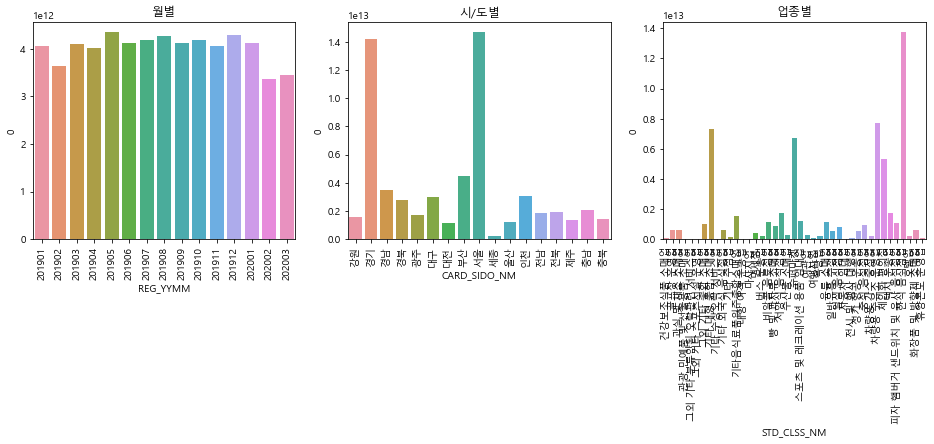

In [275]:
plt.figure(figsize = (16,4))
for idx, d in enumerate(all_amt.items()):
    title, d = d
    plt.subplot(1,3,idx+1)
    sns.barplot(x=d.index, y = d[0])
    plt.xticks(size=10,rotation=90)
    plt.title(title)

## 시도별 월별 매출

In [105]:
place_month_amt = pd.DataFrame(data.groupby(["REG_YYMM","CARD_SIDO_NM"])["AMT"].sum())

In [138]:
# unique 한 값 추출
places = data["CARD_SIDO_NM"].unique()
months = data["REG_YYMM"].unique()

In [139]:
# 월, 장소 추가
place_month_amt["place"]=list(places)*(255//len(places))
place_month_amt["month"]=list(months)*(255//len(months))

# index 초기화
place_month_amt.index = range(255)

<Figure size 720x7200 with 0 Axes>

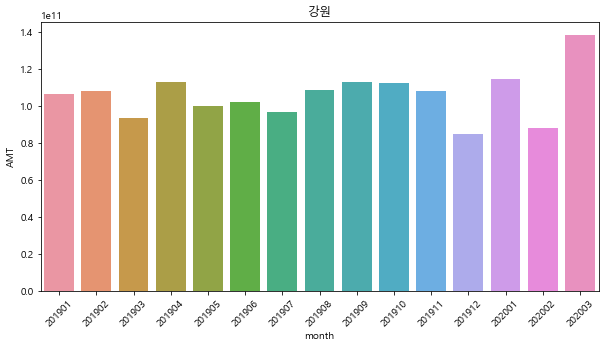

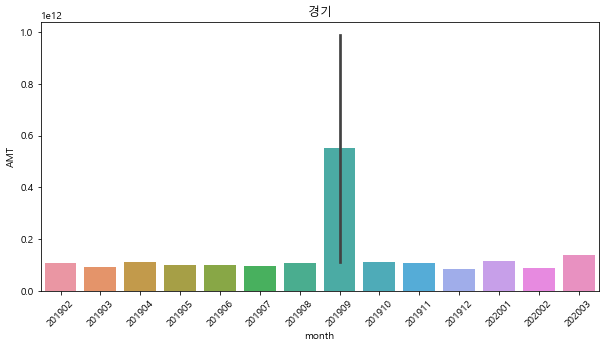

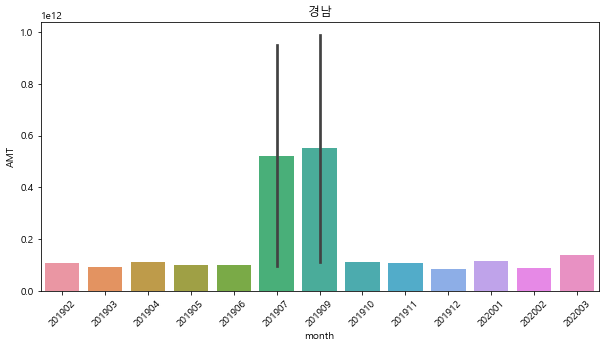

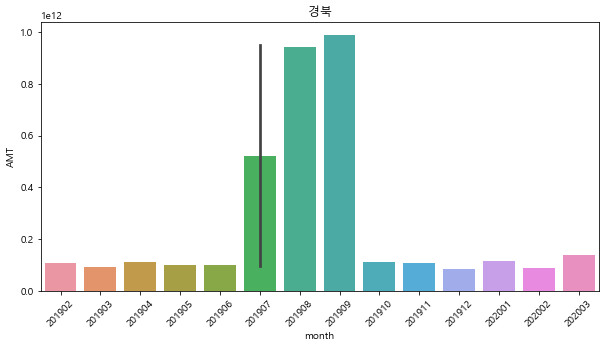

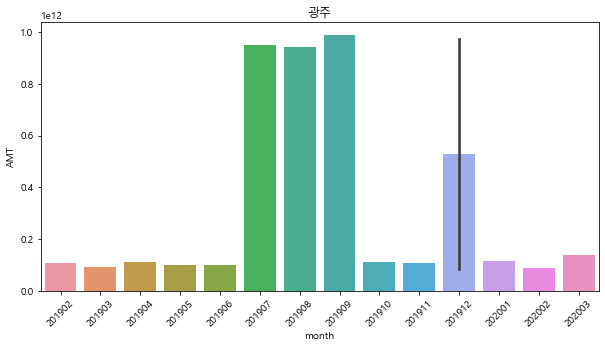

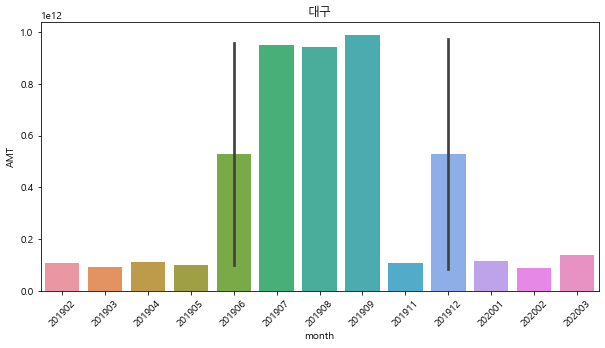

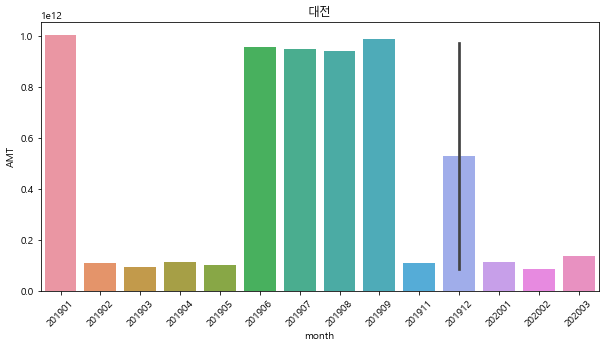

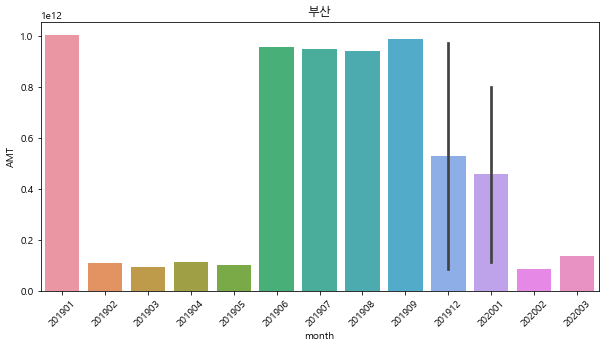

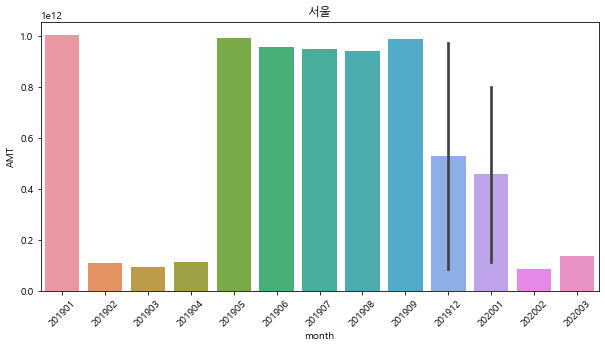

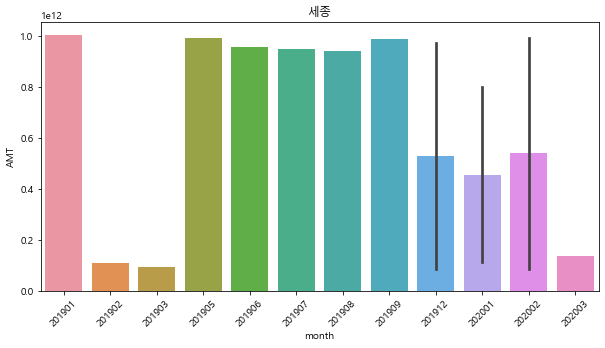

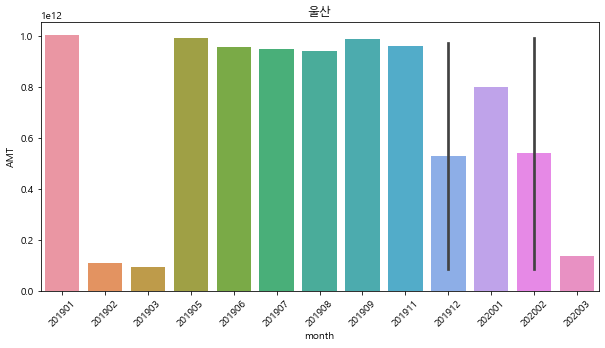

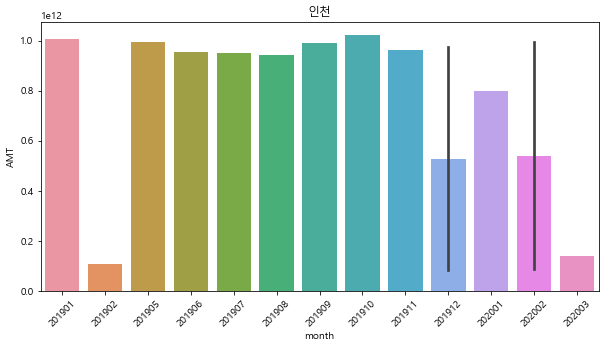

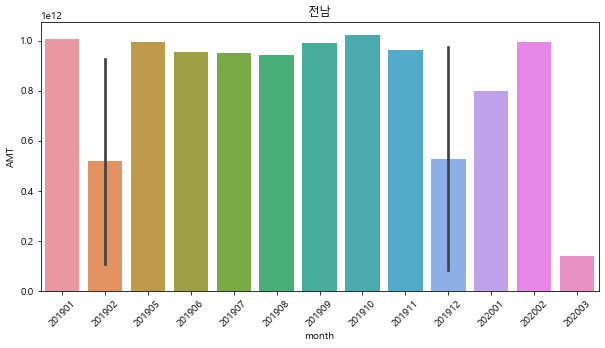

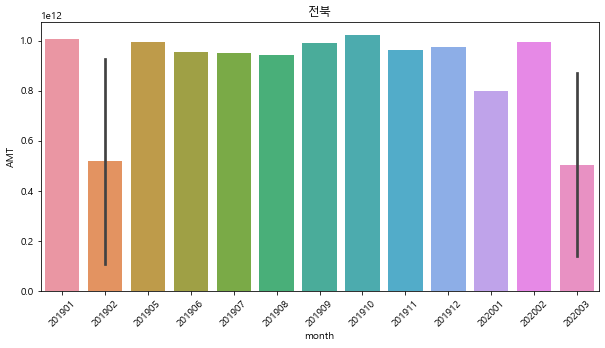

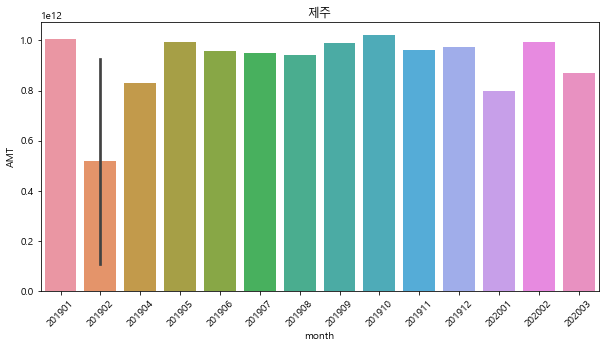

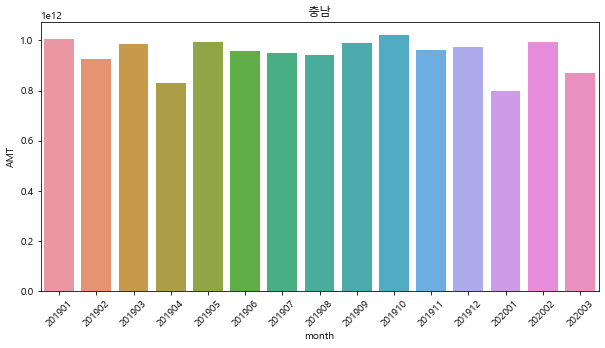

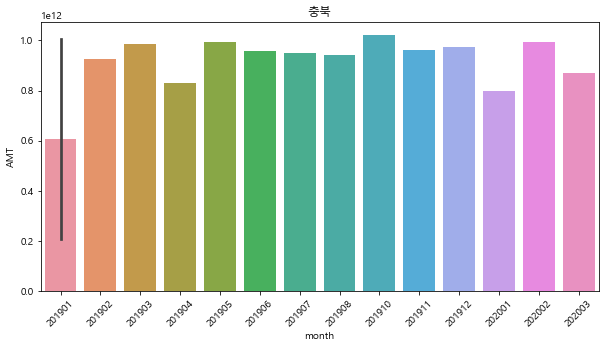

In [165]:
plt.figure(figsize = (10,100))
places.sort()
for i in range(len(places)):
    plt.figure(figsize = (10,100))
    plt.subplot(len(places),1,i+1)
    sub_data = place_month_amt.sort_values(by=["place"])[i:i+15]
    sns.barplot(x="month", y= "AMT", data = sub_data)
    plt.title(places[i])
    plt.xticks(size=10,rotation=45)
    plt.show()

## 거주지 소비 or 외적 소비
- 지역별 거주지 소비와 외적 소비의 비율 확인

In [228]:
# 거주지 소비와 외적 소비 나눔
bool_data = data["CARD_SIDO_NM"]==data["HOM_SIDO_NM"]
home = data[bool_data]
out = data[~bool_data]

# 지역별로 거주지 소비와 외적 소비 사용금액 확인
home_amt = home.groupby(["CARD_SIDO_NM"])["AMT"].sum()
out_amt = out.groupby(["CARD_SIDO_NM"])["AMT"].sum()

# 데이터 프레임 생성
total_home_out = pd.DataFrame(index=home_amt.index)
total_home_out["home"]=home_amt
total_home_out["out"]=out_amt
total_home_out["out/total"]=total_home_out["out"]/(total_home_out["home"]+total_home_out["out"])

In [279]:
total_home_out.sort_values(by=["out/total"], ascending=False)

,home,out,out/total
CARD_SIDO_NM,,,
서울,10092021194371,4585109854660,0.312398
제주,1017397760074,326184464694,0.242772
강원,1204443934968,385167364951,0.242303
세종,156965899441,47079917907,0.230732
인천,2374676626919,681570835994,0.223009
경북,2234756004003,532864591245,0.192535
충남,1719294865555,383902509553,0.182533
전남,1556688799700,283071977439,0.153863
충북,1245478356168,219958829755,0.150098


No handles with labels found to put in legend.


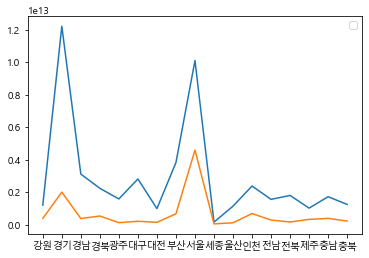

In [196]:
# 시각화
plt.plot(home_out)
plt.show()

## 거주지 소비, 외적 소비에서의 코로나 영향 확인
- 201902,201903와 202002, 202003의 데이터 비교를 통해 거주지 소비와 외적소비가 각각 얼마나 코로나의 영향을 받는지 확인

--------------------------------------------------
- 뚜렷하게 외적 소비가 거주지 소비보다 코로나의 영향으로 더 많은 사용금액 감소가 나타남

In [229]:
#201902,201903을 코로나 전으로, 202002,202003을 코로나 후로 하여 데이터 분리
before_home_amt = home.loc[:22098304,:]
after_home_amt = home.loc[22098304:,:]

before_out_amt = out.loc[:22098322,:]
after_out_amt = out.loc[22098322:,:]

before_home_amt = before_home_amt.loc[(before_home_amt["REG_YYMM"]==201902) | (before_home_amt["REG_YYMM"]==201903),:]
before_out_amt = before_out_amt.loc[(before_out_amt["REG_YYMM"]==201902) | (before_out_amt["REG_YYMM"]==201903),:]

# 지역별로 데이터를 나눈 후 사용 금액 합산
before_home_amt = before_home_amt.groupby(["CARD_SIDO_NM"])["AMT"].sum()
before_out_amt = before_out_amt.groupby(["CARD_SIDO_NM"])["AMT"].sum()

after_home_amt = after_home_amt.groupby(["CARD_SIDO_NM"])["AMT"].sum()
after_out_amt = after_out_amt.groupby(["CARD_SIDO_NM"])["AMT"].sum()

# 각 데이터를 하나의 데이터 프레임으로 합침
before_home_out = pd.DataFrame(index=home_amt.index)
after_home_out = pd.DataFrame(index=home_amt.index)

before_home_out["home"]=before_home_amt
before_home_out["out"]=before_out_amt

after_home_out["home"]=after_home_amt
after_home_out["out"]=after_out_amt

home_out = before_home_out.merge(after_home_out, on=before_home_out.index)
home_out.columns = ["places","before_home","before_out","after_home","after_out"]

In [230]:
# 코로나 전과 후의 거주지 소비, 외적 소비 증감율 칼럼 추가
home_out["home_difference"]=(home_out["after_home"]-home_out["before_home"])/home_out["before_home"]
home_out["out_difference"] =(home_out["after_out"]-home_out["before_out"])/home_out["before_out"]

home_out.index = home_out["places"]
home_out = home_out.drop(["places"],axis=1)

In [231]:
home_out.sort_values(by="out_difference")

,before_home,before_out,after_home,after_out,home_difference,out_difference
places,,,,,,
제주,130397132427,41028539578,123217376587,17424614351,-0.055061,-0.575305
대구,366697575870,29658962640,307663804255,14985600233,-0.160988,-0.494736
전북,226970133302,21766537103,214143115402,11520758479,-0.056514,-0.470712
인천,326612049206,92332784266,278965573472,55025487561,-0.145881,-0.404053
부산,503459827325,95080003843,423049940995,62313336429,-0.159715,-0.344622
대전,126744406012,19614672175,117853727750,12884210057,-0.070147,-0.343134
광주,200640690764,16836369074,195785256614,11420038884,-0.024200,-0.321704
강원,150276069697,43465120261,142959054484,30235535616,-0.048690,-0.304372
경북,285240802642,67190177470,255253759028,48308710766,-0.105129,-0.281015


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


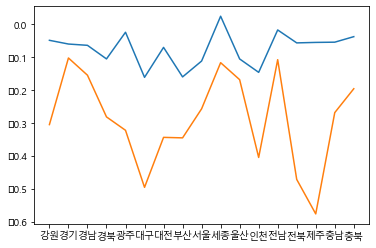

In [284]:
plt.plot(home_out.iloc[:,4:6])

## 업종별 코로나 effect

In [310]:
#201902,201903을 코로나 전으로, 202002,202003을 코로나 후로 하여 데이터 분리
before_amt = data.loc[(data["REG_YYMM"]==201902) | (data["REG_YYMM"]==201903),:]
after_amt = data.loc[(data["REG_YYMM"]==202002) | (data["REG_YYMM"]==202003),:]

# 업종별로 데이터를 나눈 후 사용 금액 합산
before_amt = before_amt.groupby(["STD_CLSS_NM"])["AMT"].sum()
after_amt = after_amt.groupby(["STD_CLSS_NM"])["AMT"].sum()

In [320]:
before_after_amt = pd.DataFrame(before_amt).merge(pd.DataFrame(after_amt), on=before_amt.index)
before_after_amt.columns = ["places","before_amt", "after_amt"]

In [328]:
before_after_amt.index=before_after_amt["places"]
before_after_amt = before_after_amt.drop(["places"], axis=1)

In [331]:
before_after_amt.columns

Index(['before_amt', 'after_amt'], dtype='object')

In [332]:
# 코로나 전과 후의 업종별 소비 증감율 칼럼 추가
before_after_amt["difference"]=(before_after_amt["after_amt"]-before_after_amt["before_amt"])/before_after_amt["before_amt"]

In [337]:
before_after_amt.to_csv("./업종별_코로나매출.csv",index=True)

In [306]:
home_out

,before_home,before_out,after_home,after_out,home_difference,out_difference
places,,,,,,
건강보조식품 소매업,11405078342,2598788433,9564316517,1529443246,-0.161398,-0.411478
골프장 운영업,27377596224,30904191932,27231372151,30396320925,-0.005341,-0.016434
과실 및 채소 소매업,68358505781,11273934427,69058631583,8140982919,0.010242,-0.277893
관광 민예품 및 선물용품 소매업,1084003179,770116315,737807063,257585750,-0.319368,-0.665524
그외 기타 분류안된 오락관련 서비스업,2201700,1975000,1916950,1043000,-0.129332,-0.471899
그외 기타 스포츠시설 운영업,483486810,10297500,148394090,1280650,-0.693075,-0.875635
그외 기타 종합 소매업,82636755272,45929202639,83524545867,51510442672,0.010743,0.121518
기타 대형 종합 소매업,856692253957,144974318498,700537301976,103766854963,-0.182277,-0.284240
기타 수상오락 서비스업,194820210,24733900,93000960,30619525,-0.522632,0.237958


In [293]:
home["STD_CLSS_NM"].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업', '호텔업',
       '면세점', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업', '버스 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

## 달의 상관관계

In [7]:
work201901 = data.loc[(data["REG_YYMM"]==201901),:]
work202001 = data.loc[(data["REG_YYMM"]==202001),:]

work201902 = data.loc[(data["REG_YYMM"]==201902),:]
work202002 = data.loc[(data["REG_YYMM"]==202002),:]

work201903 = data.loc[(data["REG_YYMM"]==201903),:]
work202003 = data.loc[(data["REG_YYMM"]==202003),:]

In [15]:
work201901_amt = work201901.groupby(["CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum()
work202001_amt = work202001.groupby(["CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum()

work201902_amt = work201902.groupby(["CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum()
work202002_amt = work202002.groupby(["CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum()

work201903_amt = work201903.groupby(["CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum()
work202003_amt = work202003.groupby(["CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum()

In [29]:
months = [work201901_amt, work202001_amt, work201902_amt, work202002_amt, work201903_amt, work202003_amt]
for idx, d in enumerate(months):
    if not idx:
        a = pd.DataFrame(d)
    if idx:
        x = pd.DataFrame(d)
        a = pd.concat([a,x], axis=1)

In [31]:
a.columns = ["201901","202001","201902","202002","201903","202003"]

In [ ]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(cor01.sales, cor01.gdp1)
corr
# 스피어만 상관계수
rho = stats.spearmanr(cor01.sales, cor01.gdp1)
rho


In [58]:
import scipy.stats as stats

In [93]:
# 39개의 업종
corr_dic = {}
# 지역별로 나눈 후
for i in range(17):
    sub_data = a[39*i:39*(i+1)]
    corr_dic[places[i]]=[]
    # 년도별 같은 달을 비교
    for date in range(0,6,2):
        sub_data_2019 = sub_data.iloc[:,date].sort_values(ascending=False)
        sub_data_2020 = sub_data.iloc[:,date+1].sort_values(ascending=False)
        corr_dic[places[i]].append(sub_data_2019)
        corr_dic[places[i]].append(sub_data_2020)

In [104]:
month_same={}
month_diff={}
for place, d in corr_dic.items():
    month_same[place]=[]
    month_diff[place]=[]
    for date in range(0,6,2):
        month_same[place].append(sum(d[date].index==d[date+1].index))
        if date!=4:
            month_diff[place].append(sum(d[date].index==d[date+2].index))
        else:
            month_diff[place].append(sum(d[0].index==d[4].index))

In [113]:
same=pd.DataFrame(month_same).sum(axis=0)
diff=pd.DataFrame(month_diff).sum(axis=0)
pd.concat([same,diff], axis=1)

# 같은 년도의 비슷한 달이 영향을 주는 것에 비해, 월별로 비슷한 추세가 있는 것을 확인

,0,1
강원,47,43
경기,39,51
경남,36,68
경북,47,53
광주,46,67
대구,31,63
대전,48,66
부산,44,54
서울,39,73
세종,39,45


In [109]:
pd.DataFrame(month_diff).sum(axis=0)

강원    43
경기    51
경남    68
경북    53
광주    67
대구    63
대전    66
부산    54
서울    73
세종    45
울산    53
인천    67
전남    60
전북    53
제주    61
충남    37
충북    38
dtype: int64

In [95]:
corr_dic["강원"][0].index==corr_dic["강원"][1].index

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True])

In [98]:
corr_dic["강원"][0].index==corr_dic["강원"][4].index

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False, False])

In [60]:
places = data["CARD_SIDO_NM"].unique()

In [61]:
places

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

## 코로나 effect 추세 확인

In [278]:
# 2월의 코로나 effect 확인
effect02 = data.loc[(data["REG_YYMM"]==201902)|(data["REG_YYMM"]==202002),:]
effect02 = pd.DataFrame(effect02.groupby(["REG_YYMM","CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum())

effect02 = effect02.reset_index()
effect02 = effect02[:627].merge(effect02[627:], on=["CARD_SIDO_NM", "STD_CLSS_NM"], how="outer")

In [280]:
# 3월의 코로나 effect 확인
effect03 = data.loc[(data["REG_YYMM"]==201903)|(data["REG_YYMM"]==202003),:]
effect03 = pd.DataFrame(effect03.groupby(["REG_YYMM","CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum())

effect03 = effect03.reset_index()
effect03 = effect03[:630].merge(effect03[630:], on=["CARD_SIDO_NM", "STD_CLSS_NM"], how="outer")

In [282]:
effect03["corona_effect"]=effect03["AMT_y"]-effect03["AMT_x"]
effect02["corona_effect"]=effect02["AMT_y"]-effect02["AMT_x"]

In [287]:
corona_effect = effect02.merge(effect03, on=["CARD_SIDO_NM","STD_CLSS_NM"], how="outer")[["CARD_SIDO_NM","STD_CLSS_NM","corona_effect_x","corona_effect_y"]]

In [290]:
corona_effect["corona_effect_diff"]=corona_effect["corona_effect_y"]-corona_effect["corona_effect_x"]
corona_effect.rename({"corona_effect_x":"corona_effect_02", "corona_effect_y":"corona_effect_03"}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


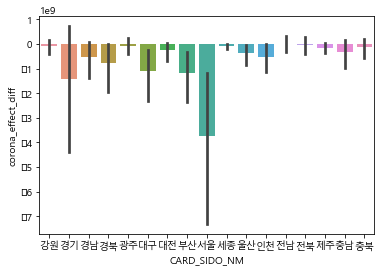

In [299]:
sns.barplot(x="CARD_SIDO_NM", y = "corona_effect_diff", data = corona_effect)

In [316]:
corona_effect

,CARD_SIDO_NM,STD_CLSS_NM,corona_effect_x,corona_effect_y,corona_effect_diff
0,강원,건강보조식품 소매업,-70210310.0,-13380013.0,56830297.0
1,강원,골프장 운영업,-183784517.0,155300856.0,339085373.0
2,강원,과실 및 채소 소매업,-249051523.0,55588993.0,304640516.0
3,강원,관광 민예품 및 선물용품 소매업,-6545649.0,-11705890.0,-5160241.0
4,강원,그외 기타 스포츠시설 운영업,-2074400.0,-4742720.0,-2668320.0
...,...,...,...,...,...
636,경기,내항 여객 운송업,NaN,48500.0,NaN
637,경북,그외 기타 분류안된 오락관련 서비스업,NaN,NaN,NaN
638,광주,택시 운송업,NaN,NaN,NaN
639,충북,내항 여객 운송업,NaN,NaN,NaN


In [305]:
sum(corona_effect["corona_effect_diff"]>0)

179

In [317]:
corona_effect[corona_effect['corona_effect_diff']<0]["STD_CLSS_NM"].value_counts()

차량용 주유소 운영업              17
기타 주점업                   17
비알콜 음료점업                 17
화장품 및 방향제 소매업            17
체인화 편의점                  17
일반유흥 주점업                 17
중식 음식점업                  17
서양식 음식점업                 17
여관업                      17
기타 외국식 음식점업              17
마사지업                     17
차량용 가스 충전업               17
일식 음식점업                  17
한식 음식점업                  17
스포츠 및 레크레이션 용품 임대업       16
빵 및 과자류 소매업              14
전시 및 행사 대행업              14
피자 햄버거 샌드위치 및 유사 음식점업    14
골프장 운영업                  13
호텔업                      13
관광 민예품 및 선물용품 소매업        12
욕탕업                      12
자동차 임대업                  10
그외 기타 스포츠시설 운영업           9
택시 운송업                    9
여행사업                      9
버스 운송업                    6
정기 항공 운송업                 5
내항 여객 운송업                 5
기타 대형 종합 소매업              4
휴양콘도 운영업                  3
수산물 소매업                   3
면세점                       3
기타 수상오락 서비스업              3
과실 및 채소 소매업               2
그외 기타 종합 소매업        

## 칼럼별 코로나 영향 확인

In [216]:
#201902,201903을 코로나 전으로, 202002,202003을 코로나 후로 하여 데이터 분리
before_amt = data.loc[(data["REG_YYMM"]==201902) | (data["REG_YYMM"]==201903),:]
after_amt = data.loc[(data["REG_YYMM"]==202002) | (data["REG_YYMM"]==202003),:]

# 칼럼별로 데이터를 나눈 후 사용 금액 합산
before_amt = before_amt.groupby(["FLC"])["AMT"].sum()
after_amt = after_amt.groupby(["FLC"])["AMT"].sum()

In [217]:
before_after_amt = pd.DataFrame(before_amt).merge(pd.DataFrame(after_amt), on=before_amt.index)
before_after_amt.columns = ["places","before_amt", "after_amt"]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


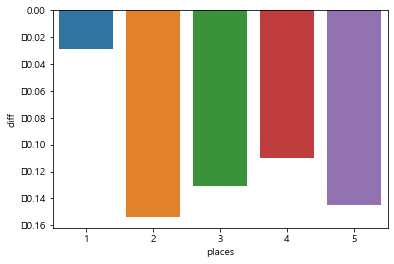

In [218]:
before_after_amt["diff"]=(before_after_amt["after_amt"]-before_after_amt["before_amt"])/before_after_amt["before_amt"]
sns.barplot(x="places", y="diff", data =before_after_amt)

In [219]:
before_after_amt

,places,before_amt,after_amt,diff
0,1,902939113648,876745851441,-0.029009
1,2,1654546944545,1399411874007,-0.154202
2,3,1499365144115,1302931384584,-0.131011
3,4,2297502982092,2044640018723,-0.110060
4,5,1385401407487,1184850242878,-0.144760


In [215]:
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6
